In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv(r"C:\Users\Om\Desktop\DS Pract Final\DS Pract 5\social_network_ads.csv")

# Split the data into features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Perform one-hot encoding for the 'Gender' column
ct = ColumnTransformer([("encoder", OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(cm)
print("\nTP:", TP)
print("FP:", FP)
print("TN:", TN)
print("FN:", FN)
print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[49  3]
 [18 10]]

TP: 10
FP: 3
TN: 49
FN: 18

Accuracy: 0.7375
Error Rate: 0.26249999999999996
Precision: 0.7692307692307693
Recall: 0.35714285714285715
F1 Score: 0.48780487804878053


Text(8.222222222222223, 0.5, 'Predicted Label')

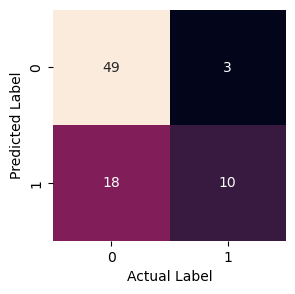

In [36]:
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(cm,annot=True,cbar=False)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")


In [37]:
err=(fn+fp)/(tn+fp+fn+tp)
err

0.32